<a id="1"></a>
<h3 style='border:0; color:Crimson'>HOMEWORK 1</h3>

<ul>
<li>Student name: Mohammed Obidou</li>
<li>Student_id: 119200016</li>
<li>Student email: Mohammed.obidou@bilgiedu.tr</li>
</ul>

<a id="top"></a>

<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:white; background:crimson; border:0' role="tab" aria-controls="home"><center>Navigation</center></h3>

* [**Heart failure Analysis**](#100)
  
* [**Data Visualization**](#200)

* [**Data Preprocessing**](#300)

* [**Model Prediction**](#400)

* [**Feature selection**](#500)

<a id=100></a>
<h4 style= 'Background:crimson; color:white; border:0'><center>Heart failure Analysis</center></h3>

Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fractions import Fraction
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.figure_factory as ff
import random
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2, f_classif, VarianceThreshold
from sklearn.feature_selection import SelectKBest
import warnings
warnings.filterwarnings("ignore")

In [2]:
heart_failure = pd.read_csv('heart_failure_clinical_records_dataset.csv')
heart_failure.head(20)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


Reading and understanding the columns 

In [3]:
heart_failure.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [4]:
heart_failure.transpose()

,0,1,2,3,4,5,6,7,8,9,...,289,290,291,292,293,294,295,296,297,298
age,75.0,55.00,65.0,50.0,65.0,90.0,75.0,60.0,65.00,80.0,...,90.0,45.0,60.0,52.0,63.0,62.0,55.0,45.0,45.0,50.0
anaemia,0.0,0.00,0.0,1.0,1.0,1.0,1.0,1.0,0.00,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
creatinine_phosphokinase,582.0,7861.00,146.0,111.0,160.0,47.0,246.0,315.0,157.00,123.0,...,337.0,615.0,320.0,190.0,103.0,61.0,1820.0,2060.0,2413.0,196.0
diabetes,0.0,0.00,0.0,0.0,1.0,0.0,0.0,1.0,0.00,0.0,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
ejection_fraction,20.0,38.00,20.0,20.0,20.0,40.0,15.0,60.0,65.00,35.0,...,38.0,55.0,35.0,38.0,35.0,38.0,38.0,60.0,38.0,45.0
high_blood_pressure,1.0,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.00,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
platelets,265000.0,263358.03,162000.0,210000.0,327000.0,204000.0,127000.0,454000.0,263358.03,388000.0,...,390000.0,222000.0,133000.0,382000.0,179000.0,155000.0,270000.0,742000.0,140000.0,395000.0
serum_creatinine,1.9,1.10,1.3,1.9,2.7,2.1,1.2,1.1,1.50,9.4,...,0.9,0.8,1.4,1.0,0.9,1.1,1.2,0.8,1.4,1.6
serum_sodium,130.0,136.00,129.0,137.0,116.0,132.0,137.0,131.0,138.00,133.0,...,144.0,141.0,139.0,140.0,136.0,143.0,139.0,138.0,140.0,136.0
sex,1.0,1.00,1.0,1.0,0.0,1.0,1.0,1.0,0.00,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0


printing the statistics of the datasets

In [5]:
heart_failure.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [6]:
heart_failure.count()

age                         299
anaemia                     299
creatinine_phosphokinase    299
diabetes                    299
ejection_fraction           299
high_blood_pressure         299
platelets                   299
serum_creatinine            299
serum_sodium                299
sex                         299
smoking                     299
time                        299
DEATH_EVENT                 299
dtype: int64

In [7]:
heart_failure.mean()

age                             60.833893
anaemia                          0.431438
creatinine_phosphokinase       581.839465
diabetes                         0.418060
ejection_fraction               38.083612
high_blood_pressure              0.351171
platelets                   263358.029264
serum_creatinine                 1.393880
serum_sodium                   136.625418
sex                              0.648829
smoking                          0.321070
time                           130.260870
DEATH_EVENT                      0.321070
dtype: float64

Checking for null values

In [8]:
heart_failure.isnull()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,False,False,False,False,False,False,False,False,False,False,False,False,False
295,False,False,False,False,False,False,False,False,False,False,False,False,False
296,False,False,False,False,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
heart_failure.isnull().any()

age                         False
anaemia                     False
creatinine_phosphokinase    False
diabetes                    False
ejection_fraction           False
high_blood_pressure         False
platelets                   False
serum_creatinine            False
serum_sodium                False
sex                         False
smoking                     False
time                        False
DEATH_EVENT                 False
dtype: bool

In [10]:
heart_failure.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

### it seems that we've no missing values and we don't have strings so we don't have to use mapping so far

---

First step let's understand the data using 
# Analysis
* Filtering data based on age-Death events 
* Smoking and death events 
* Diabetes and death events 
* sex and death events

In [11]:
heart_failure.sort_values("age", axis = 0, ascending = False)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
26,95.0,1,112,0,40,1,196000.00,1.00,138,0,0,24,1
55,95.0,1,371,0,30,0,461000.00,2.00,132,1,0,50,1
30,94.0,0,582,1,38,1,263358.03,1.83,134,1,0,27,1
36,90.0,1,60,1,50,0,226000.00,1.00,134,1,0,30,1
5,90.0,1,47,0,40,1,204000.00,2.10,132,1,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,40.0,0,244,0,45,1,275000.00,0.90,140,0,0,174,0
248,40.0,0,624,0,35,0,301000.00,1.00,142,1,1,214,0
206,40.0,1,101,0,40,0,226000.00,0.80,141,0,0,187,0
269,40.0,0,582,1,35,0,222000.00,1.00,132,1,0,244,0


<a id=200></a>
<h4 style= 'Background:crimson; color:white; border:0'><center>Data Visualization</center></h3>

let's plot the different ages 

<Axes: ylabel='Frequency'>

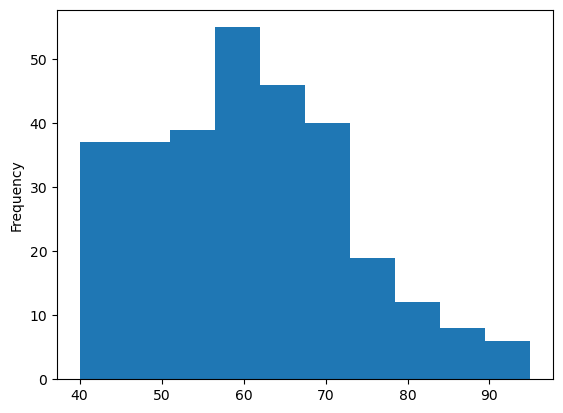

In [12]:
heart_failure['age'].plot(kind='hist')

we can see that we have samples of ages 40 to 95, and the most age sample we've is 60

---

Get the adults whose ages are between 25 and 50

In [13]:
adult = heart_failure[heart_failure['age'] >= 25] 
adult = adult[adult['age'] <= 50] #Adults between 25 and 50
adult.sort_values('age', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
189,40.0,0,244,0,45,1,275000.0,0.9,140,0,0,174,0
180,40.0,0,478,1,30,0,303000.0,0.9,136,1,0,148,0
206,40.0,1,101,0,40,0,226000.0,0.8,141,0,0,187,0
248,40.0,0,624,0,35,0,301000.0,1.0,142,1,1,214,0
269,40.0,0,582,1,35,0,222000.0,1.0,132,1,0,244,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,50.0,0,582,0,50,0,153000.0,0.6,134,0,0,172,1
192,50.0,1,121,1,40,0,260000.0,0.7,130,1,0,175,0
198,50.0,1,582,1,20,1,279000.0,1.0,134,0,0,186,0
145,50.0,0,185,0,30,0,266000.0,0.7,141,1,1,112,0


get seniors who are above 50 years of age

In [14]:
senior = heart_failure[heart_failure['age'] >= 50] #elders whose age is 50 or more
senior.sort_values('age', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
26,95.0,1,112,0,40,1,196000.00,1.00,138,0,0,24,1
55,95.0,1,371,0,30,0,461000.00,2.00,132,1,0,50,1
30,94.0,0,582,1,38,1,263358.03,1.83,134,1,0,27,1
36,90.0,1,60,1,50,0,226000.00,1.00,134,1,0,30,1
289,90.0,1,337,0,38,0,390000.00,0.90,144,0,0,256,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,50.0,1,121,1,40,0,260000.00,0.70,130,1,0,175,0
198,50.0,1,582,1,20,1,279000.00,1.00,134,0,0,186,0
205,50.0,1,167,1,45,0,362000.00,1.00,136,0,0,187,0
211,50.0,0,582,0,62,1,147000.00,0.80,140,1,1,192,0


### AGE AND HEART FAILURE

In [15]:
senior['DEATH_EVENT'].count()

252

In [16]:
adult['DEATH_EVENT'].count()

74

We've way more senior samples so for the sake of equal comparison let's make them of equal samples

In [17]:
senior = senior.head(74)
senior.count()

age                         74
anaemia                     74
creatinine_phosphokinase    74
diabetes                    74
ejection_fraction           74
high_blood_pressure         74
platelets                   74
serum_creatinine            74
serum_sodium                74
sex                         74
smoking                     74
time                        74
DEATH_EVENT                 74
dtype: int64

In [18]:
senior_death = senior[senior['DEATH_EVENT'] == 1] #get the elders who has death event
senior_death = senior_death['DEATH_EVENT'].value_counts() # count how many elders passed away
senior_death
#print(f'The death Event of Senior is: {senior['DEATH_EVENT'].value_count()} ')

1    58
Name: DEATH_EVENT, dtype: int64

In [19]:
adult_death = adult[adult['DEATH_EVENT'] == 1] #get the elders who has death event
adult_death = adult_death['DEATH_EVENT'].value_counts() # count how many elders passed away
adult_death

1    19
Name: DEATH_EVENT, dtype: int64

so 58 senior poeple died from heart failure and 19 adults died from heart failure

Draw pie chart analyzing the death of elders vs adults because of heart failure

In [20]:
adult_survived = heart_failure[(heart_failure["DEATH_EVENT"]==0) & (heart_failure["age"]>=60)] # 60 or younger that survived
adult_died = heart_failure[(heart_failure["DEATH_EVENT"]==1) & (heart_failure["age"]>=60)] # 60 or younger that passed away
senior_survived = heart_failure[(heart_failure["DEATH_EVENT"]==0) & (heart_failure["age"]<60)] # older than 60 that survived
senior_died = heart_failure[(heart_failure["DEATH_EVENT"]==1) & (heart_failure["age"]<60)] #older than 60 that passed away

label1 = ["Senior","Adult"] #pie chart 1 labels
label2 = ['Adult - Survived','Adult - Died', "Senior -  Survived", "Senior - Died"] #pie chart 2 labels
values1 = [(len(adult_survived)+len(adult_died)), (len(senior_survived)+len(senior_died))] #count adults in total and seniors in total
values2 = [len(adult_survived),len(adult_died),len(senior_survived),len(senior_died)] # count each

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=label1, values=values1, name="AGE"),
              1, 1)
fig.add_trace(go.Pie(labels=label2, values=values2, name="AGE VS DEATH_EVENT"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent")


fig.update_layout(
    title_text="AGE [Senior vs Adult] DESTRIBUTION IN THE DATASET\
                   AGE VS DEATH_EVENT",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='AGE', x=0.19, y=0.5, font_size=10, showarrow=False),
                 dict(text='AGE VS DEATH_EVENT', x=0.84, y=0.5, font_size=9, showarrow=False)],
    autosize=False,width=1200, height=500, paper_bgcolor="white")

fig.show()

**AGE**: the heart is a muscle and muscle wear out, with age the heart gets weaker thus might result in heart failure

> Chances of survival:
> * Adults(between 25 and 50): 39.5%
> * Seniors (above 50): 28.4%

---

Histogram showing the relation of age and diabetes

In [21]:
fig = px.histogram(heart_failure, x="age", color="diabetes",  hover_data=heart_failure.columns,
                   title ="Distribution of AGE Vs DIABETES", 
                   labels={"diabetes": "DIABETES", "age": "AGE"},
                   template="plotly_dark",
                   color_discrete_sequence=['deeppink', 'cyan'])
fig.show()

we can more clearly see in the pink color the non diabetic tend to be younger
and the diabetic in blue tends to be older in age

In [22]:
diabetic_age = heart_failure[heart_failure["diabetes"]==0]["age"]
non_diabetic_age = heart_failure[heart_failure["diabetes"]==1]["age"]
data = [diabetic_age,non_diabetic_age]
label = ['diabetic', 'Not diabetic']
fig = ff.create_distplot(data, label, bin_size=0.7)
fig.update_layout(
    title_text="Age and Diabetes")
fig.show()

a more simple histogram showing that the chances of having diabetes the older you're are higher

In [23]:
fig = px.histogram(heart_failure, x="age", y="diabetes", color_discrete_sequence=['crimson'])
fig.show()

Histogram showing age and heart_failure 

In [24]:
fig = px.histogram(heart_failure, x="age", y="DEATH_EVENT", color_discrete_sequence=['lightgreen'])
fig.show()

* age 40 has the least death at 1 sum of death
* age 58-62 has the highest sum of death at 20

---

### GENDER DISTRIBUTION

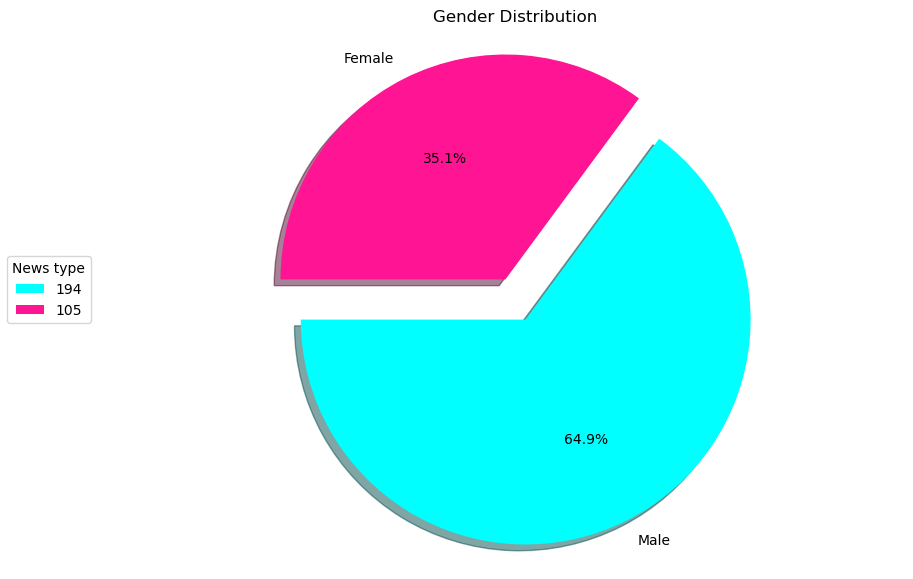

In [25]:
male = heart_failure[heart_failure['sex']==1].count()
female = heart_failure[heart_failure['sex']==0].count()
data = [male['sex'], female['sex']]

#creating pie chart
pie = plt.figure(figsize=(10,7))
plt.pie(data, labels = ['Male', 'Female'], explode=[0.0, 0.2], colors=['cyan', 'deeppink'], autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
pie.legend(data,
          title ="News type",
          loc ="center left",
          )
plt.title("Gender Distribution")
plt.show()

* Female 35.1%
* Male 64.9%
* Ratio Male to Female 1.94:1.05

In [26]:
heart_failure['sex'].value_counts()

1    194
0    105
Name: sex, dtype: int64

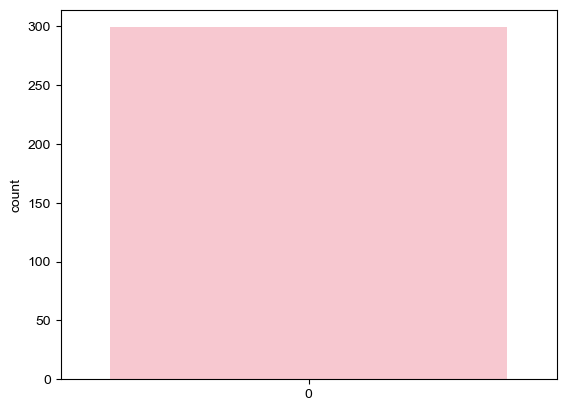

In [27]:
sns.countplot(heart_failure['sex'], palette = ["pink", 'cyan'])
sns.set_theme(style="whitegrid")


In [28]:
male = heart_failure[heart_failure['sex']==1]['sex'].count()
female = heart_failure[heart_failure['sex']==0]['sex'].count()

ratio = Fraction(Fraction(male), Fraction(female)).limit_denominator()

print(f"{ratio.numerator / 100} : {ratio.denominator / 100}")

1.94 : 1.05


more male than Female almost twice as much 

---

Gender and death events

In [29]:
fig = px.violin(heart_failure, y="age", x="sex", color="DEATH_EVENT", box=True, points="all", hover_data=heart_failure.columns, color_discrete_sequence=['cyan', 'deeppink'])
fig.update_layout(title_text="Gender and Age on death   events")
fig.show()

* cyan indicates the death
* pink indicates survived
* the left side on the X-axis is Female
* the right side on the Y-axis is Male
* Age 60 seems to be the most death_events for both genders
* in general male survival chances seems to be higher

---

In [30]:
dead = heart_failure[heart_failure["DEATH_EVENT"]==1]

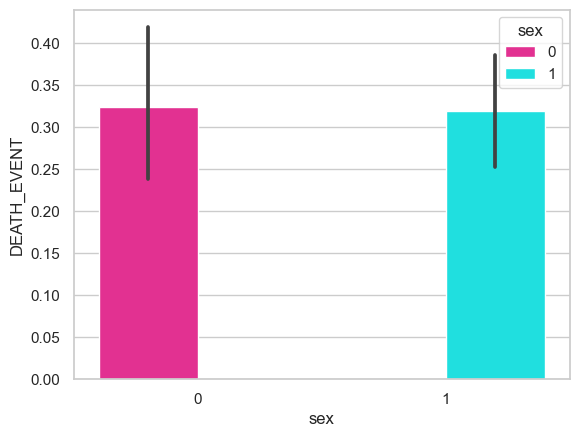

In [31]:
bar = sns.barplot(data=heart_failure, x='sex', y='DEATH_EVENT', hue='sex', palette=['deeppink', 'cyan'])

### SMOKING effects on heart failure

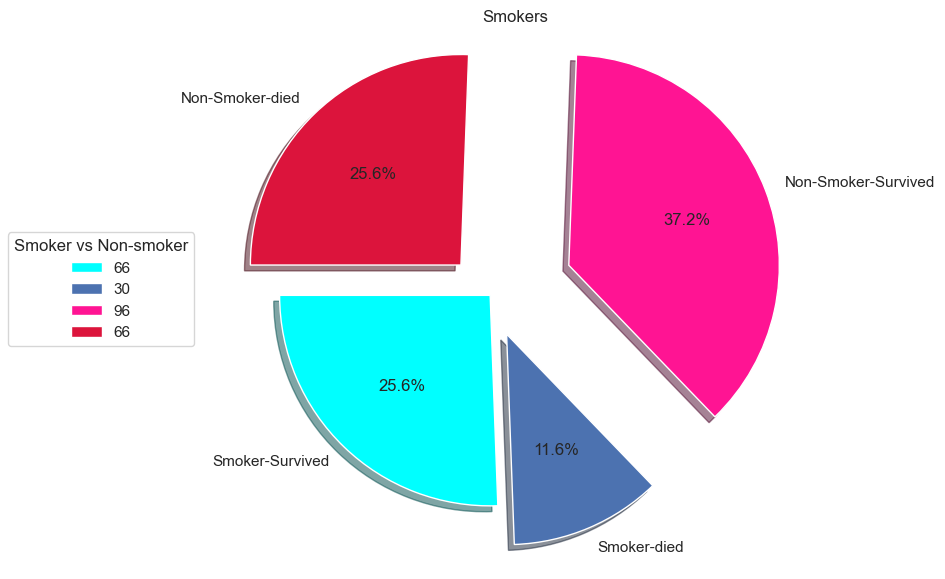

In [32]:
smoker_survived = heart_failure[(heart_failure["DEATH_EVENT"]==0) & (heart_failure["smoking"]==1)] # Get deat_events column/get death events false/ and get smoking column/get smoker true
smoker_died = heart_failure[(heart_failure["DEATH_EVENT"]==1) & (heart_failure["smoking"]==1)] # Get deat_events column/get death events true/ and get smoking column/get smoker true
non_smoker_survived = heart_failure[(heart_failure["DEATH_EVENT"]==0) & (heart_failure["smoking"]==0)] # Get deat_events column/get death events false/ and get smoking column/get smoker false
non_smoker_died = heart_failure[(heart_failure["DEATH_EVENT"]==1) & (heart_failure["smoking"]==0)] # Get deat_events column/get death events true/ and get smoking column/get smoker false

data = [len(smoker_survived.head(96)), len(smoker_died.head(96)), len(non_smoker_survived.head(96)), len(non_smoker_died.head(96))]
label = ['Smoker-Survived', 'Smoker-died', 'Non-Smoker-Survived', 'Non-Smoker-died']

#creating pie chart
pie = plt.figure(figsize=(10,7))
plt.pie(data, labels = label, explode=[0.0, 0.2, 0.4,0.2], colors=['cyan', 'b', 'deeppink', 'crimson'], autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
pie.legend(data,
          title ="Smoker vs Non-smoker",
          loc ="center left",
          )
plt.title("Smokers")
plt.show()

**Smoking:** The chemicals you inhale when you smoke cause damage to your heart and blood vessels that makes you more likely to develop atherosclerosis, or plaque buildup in the arteries. Smoking also damages the vessels which the blood runs through to get from-to the heart  

> Smokers chances of Surviving Heart failure
> * Smoker: 25.6%
> * non-smoker: 37.2%

The data doesn't seem to be very reliable, let's check the distribution

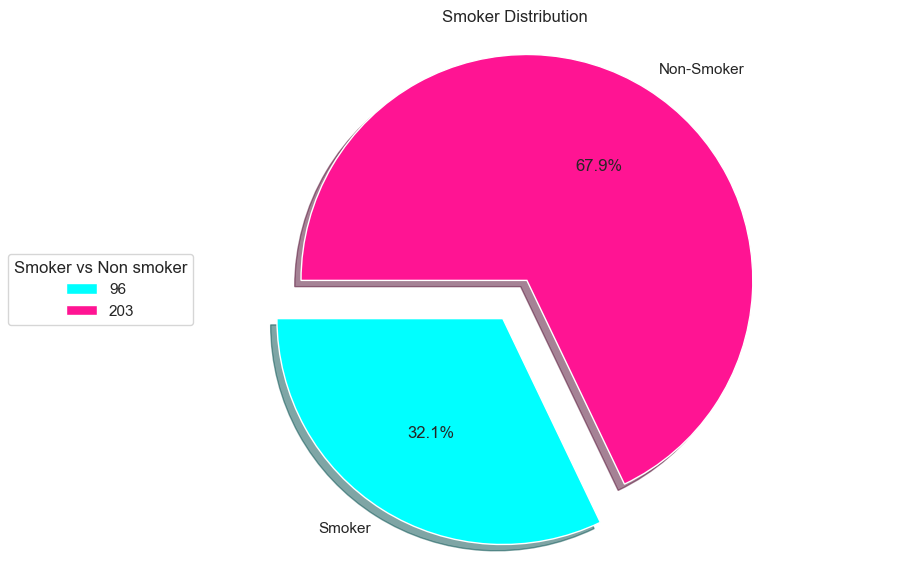

In [33]:
smoker = heart_failure[(heart_failure["smoking"]==1)].count() # Get deat_events column/get death events false/ and get smoking column/get smoker true
non_smoker = heart_failure[(heart_failure["smoking"]==0)].count() # Get deat_events column/get death events true/ and get smoking column/get smoker false

data = [smoker['smoking'], non_smoker['smoking']]
label = ['Smoker', 'Non-Smoker']

#creating pie chart
pie = plt.figure(figsize=(10,7))
plt.pie(data, labels = label, explode=[0.0, 0.2], colors=['cyan', 'deeppink'], autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
pie.legend(data,
          title ="Smoker vs Non smoker",
          loc ="center left",
          )
plt.title("Smoker Distribution")
plt.show()


we've more non-smokers than smokers so I filtered the data to take equal samples but even then
it appears that smoking is good for evading heart failure but that's not a big surprise since we don't have 
that many samples

In [34]:
col = (np.random.random(), np.random.random(), np.random.random())
col

(0.34312373569623134, 0.9693288028156786, 0.8671984762930268)

In [35]:
fig = px.histogram(heart_failure, x="smoking", y="DEATH_EVENT", color_discrete_sequence=[f'rgb{col}'])
fig.show()

non smokers in this dataset has lower death rate however has we've seen that it doesn't mean that they have a higher chances of survival because we don't have equal distribution

---

### BLOOD PRESSURE AND HEART FAILURE

In [36]:
high_bp = heart_failure[heart_failure["high_blood_pressure"]==1]
low_bp = heart_failure[heart_failure["high_blood_pressure"]==0]
print(high_bp['high_blood_pressure'].count(), low_bp['high_blood_pressure'].count())

105 194


In [37]:
high_bp_survived = heart_failure[(heart_failure["DEATH_EVENT"]==0) & (heart_failure["high_blood_pressure"]==1)].head(105)
high_bp_died = heart_failure[(heart_failure["DEATH_EVENT"]==1) & (heart_failure["high_blood_pressure"]==1)].head(105)
low_bp_survived = heart_failure[(heart_failure["DEATH_EVENT"]==0) & (heart_failure["high_blood_pressure"]==0)].head(105)
low_bp_died = heart_failure[(heart_failure["DEATH_EVENT"]==1) & (heart_failure["high_blood_pressure"]==0)].head(105)

label1 = ["low BP","High BP"]
label2 = ['High BP - Survived','High BP - Died', "Low BP -  Survived", "Low BP  - Died"]
values1 = [(len(high_bp_survived)+len(high_bp_died)), (len(low_bp_survived)+len(low_bp_died))]
values2 = [len(high_bp_survived),len(high_bp_died),len(low_bp_survived),len(low_bp_died)]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=label1, values=values1, name="HIGH BP"),
              1, 1)
fig.add_trace(go.Pie(labels=label2, values=values2, name="HIGH BP VS DEATH_EVENT"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent")

fig.update_layout(
    title_text=f"HIGH BP DISTRIBUTION {' '*28}\
                  HIGH BP VS DEATH_EVENT",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='HIGH BP', x=0.20, y=0.5, font_size=10, showarrow=False),
                 dict(text='HIGH BP VS DEATH_EVENT', x=0.84, y=0.5, font_size=8, showarrow=False)],
    autosize=False,width=1200, height=500, paper_bgcolor="white")
fig.show()

**high HP:** when you've high blood pressure it's because the contraction gets stronger and decontraction weaker thus resulting in higher BP
Hypertension can also happen when we've tight vessels but when you have high BP the blood is unbalanced causing a lot of strain on
the heart resulting in heart failure, and we can see the illustration by the samples

> Chances of survival
> * with high BP: 24.7%
> * without high BP: 40%

---

### Anemia pie chart

In [38]:
no_anaemia_survived = heart_failure[(heart_failure["DEATH_EVENT"]==0) & (heart_failure["anaemia"]==0)]
no_anaemia_died = heart_failure[(heart_failure["DEATH_EVENT"]==1) & (heart_failure["anaemia"]==0)]
anaemia_survived = heart_failure[(heart_failure["DEATH_EVENT"]==0) & (heart_failure["anaemia"]==1)]
anaemia_died = heart_failure[(heart_failure["DEATH_EVENT"]==1) & (heart_failure["anaemia"]==1)]

label1 = ["No Anaemia","Anaemia"]
label2 = ['No Anaemia - Survived','No Anaemia - Died', "Anaemia -  Survived", "Anaemia  - Died"]
values1 = [(len(no_anaemia_survived)+len(no_anaemia_died)), (len(anaemia_survived)+len(anaemia_died))]
values2 = [len(no_anaemia_survived),len(no_anaemia_died),len(anaemia_survived),len(anaemia_died)]


# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=label1, values=values1, name="ANAEMIA"),
              1, 1)
fig.add_trace(go.Pie(labels=label2, values=values2, name="ANAEMIA VS DEATH_EVENT"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent")

fig.update_layout(
    title_text=f"ANAEMIA DISTRIBUTION {' '*25} \
                  ANAEMIA VS DEATH_EVENT",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='ANAEMIA', x=0.20, y=0.5, font_size=10, showarrow=False),
                 dict(text='ANAEMIA VS DEATH_EVENT', x=0.84, y=0.5, font_size=8, showarrow=False)],
    autosize=False,width=1200, height=500, paper_bgcolor="white")
fig.show()

**Anaemia:** is the loss of blood / deficiencies of iron in the blood. low supply of blood might lead to heart failure

> Chances of survival
> * with Anaemia: 27.8%
> * without Anaemia: 40.1%

In [39]:
non_diabetic_survived = heart_failure[(heart_failure["DEATH_EVENT"]==0) & (heart_failure["diabetes"]==0)]
diabetic_survived = heart_failure[(heart_failure["DEATH_EVENT"]==0) & (heart_failure["diabetes"]==1)]
non_diabetic_died = heart_failure[(heart_failure["DEATH_EVENT"]==1) & (heart_failure["diabetes"]==0)]
diabetic_died = heart_failure[(heart_failure["DEATH_EVENT"]==1) & (heart_failure["diabetes"]==1)]

label1 = ["No Diabetes","Diabetes"]
label2 = ['No Diabetes - Survived','Diabetes - Survived', "No Diabetes -  Died", "Diabetes  - Died"]
values1 = [(len(non_diabetic_survived)+len(non_diabetic_died)), (len(diabetic_survived)+len(diabetic_died))]
values2 = [len(non_diabetic_survived),len(diabetic_survived),len(non_diabetic_died),len(diabetic_died)]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=label1, values=values1, name="DIABETES"),
              1, 1)
fig.add_trace(go.Pie(labels=label2, values=values2, name="DIABETES VS DEATH_EVENT"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent")

fig.update_layout(
    title_text=f"DIABETES DISTRIBUTION {' ' *28}\
                  DIABETES VS DEATH_EVENT",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='DIABETES', x=0.20, y=0.5, font_size=10, showarrow=False),
                 dict(text='DIABETES VS DEATH_EVENT', x=0.84, y=0.5, font_size=8, showarrow=False)],
    autosize=False,width=1200, height=500, paper_bgcolor="white")
fig.show()

**Diabetic**: People with diabetes are 2 to 4 times more likely than others to develop cardiovascular disease. Because this risk is so high, cardiovascular disease remains the most common cause of death in people with diabetes.

> Chances of survival:
> * no diabetic: 39.5%
> * diabetic: 28.4%

Heatmap to show the correlation between the columns

<Axes: >

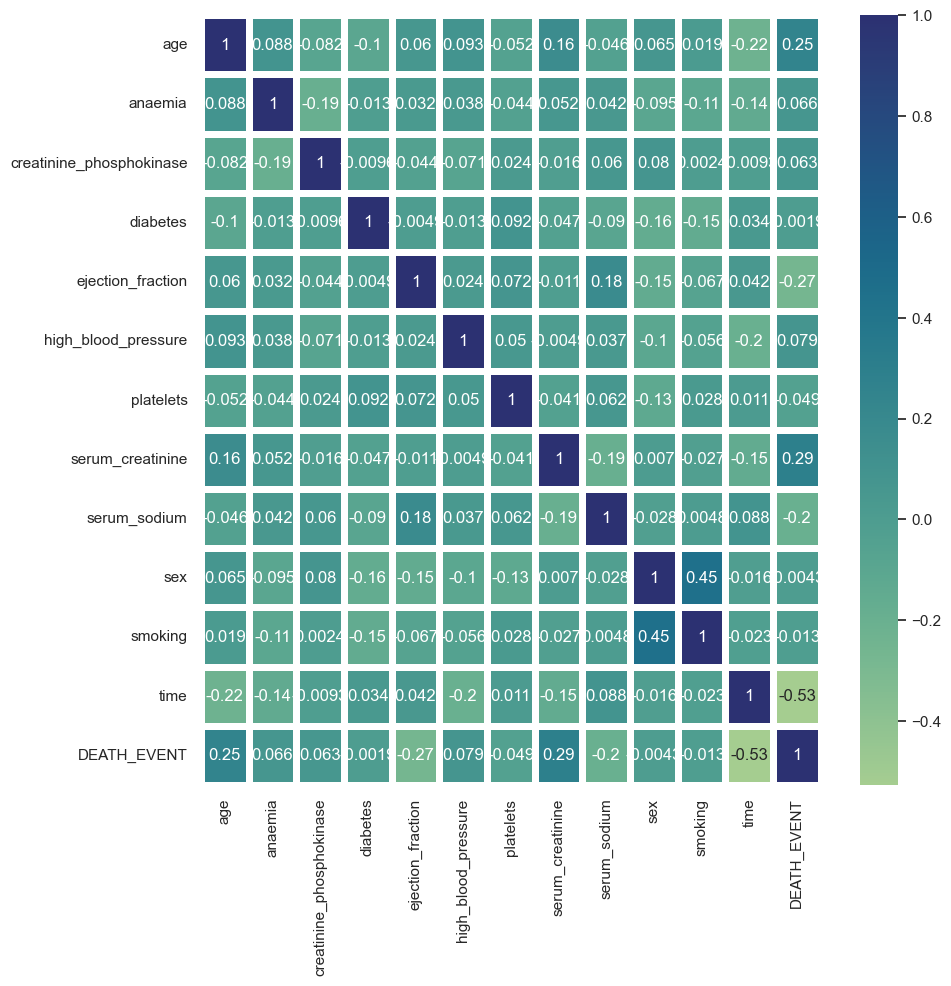

In [40]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(heart_failure.corr(), annot=True, cmap='crest', linewidth=5)

Interesting facts from heatmap
* **Serum_creatinine** has the highest correlation with death in other words it's the most dangerous according to our data followed by death
* **Serum_Creatine** is the enzymes of the kidney and abnormal levels means trouble in the kidney causing harm to the supply of blood to the heart
* **Smoking** has high correlation with sex since most of smokers in the dataset and in general are men

<a id=300></a>
<h4 style= 'Background:crimson; color:white; border:0'><center>Preprocessing</center></h3>

> * There's multiple types of preprocessing
> * it's used to replace unwanted variables like strings
> * Scaling is one type of preprocessing and it's to set the range of variables between 0-100, 0-1 etc...

In [41]:
heart_failure.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


* We don't have index in the dataset, so there's no need to drop a column
* we also have no string values so there's no need for mapping
* platelets however have very high values so let's transform it between 0-100

In [42]:
x = heart_failure.iloc[:, [4,7,11]].values
y = heart_failure.iloc[:,-1].values

Splitting the data for training and testing 

this means that part of the data will be fed to the model 

the other part is used for testing the accuracy of the model

I will be using 80-20

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state =0)

In [44]:
# Feature Scaling
sc = StandardScaler() #Standardize features by removing the mean and scaling to unit variance
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

<a id=400></a>
<h4 style= 'Background:crimson; color:white; border:0'><center>Models and Predictions</center></h3>

<h4 style="border:0; color:crimson">Ensemble Learning</h4>

Please refer to this [notebook](https://github.com/ayman-codes/Deep_Learning/blob/main/Project_final/Trust_News/Fake_news_Gradio.ipynb) for proper documentation and explanation of ensemble learning

This was for my project last semester for Artificial Intelligence course, it's not perfect but im still working on it

In [45]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

Initializing and training the model

In [46]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

Model testing

In [47]:
y_pred = lr.predict(x_test) #predicting the test set

In [48]:
models_accuracy = []
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
models_accuracy.append(accuracy) # we're gonna need the accuracy to plot the accuracy of models and compare them 
print(cm)
print(accuracy)

[[34  3]
 [11 12]]
0.7666666666666667


---

### K-nearest neighbor

training model

In [49]:
knc = KNeighborsClassifier(n_neighbors=6)
knc.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=6)

testing the model

In [50]:
y_pred = knc.predict(x_test)
print(y_pred)

[0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0]


accuracy

In [51]:
cm = confusion_matrix(y_test, y_pred) #evaluate the accuracy of a classification.
accuracy = accuracy_score(y_test, y_pred) #get the accuracy
models_accuracy.append(accuracy) # append acccuracy to list
print(cm)
print(accuracy)

[[36  1]
 [10 13]]
0.8166666666666667


---

Support vector classifier

model training

In [52]:
svc = SVC(C = 0.6, random_state=0, kernel = 'rbf')
svc.fit(x_train, y_train)

SVC(C=0.6, random_state=0)

In [53]:
y_pred = svc.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f'Confusion matrix is:\n{cm}')
print(f'\nThe accuracy score is: {accuracy}')
models_accuracy.append(accuracy)
print(f'\nModel predictions is: {y_pred}')

Confusion matrix is:
[[35  2]
 [10 13]]

The accuracy score is: 0.8

Model predictions is: [0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0]


---

### DECISION TREE CLASSIFIER

model training

In [54]:
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [55]:
y_pred = dtc.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f'Confusion matrix is:\n{cm}')
print(f'\nThe accuracy score is: {accuracy}')
models_accuracy.append(accuracy)
print(f'\nModel predictions is: {y_pred}')

Confusion matrix is:
[[33  4]
 [ 5 18]]

The accuracy score is: 0.85

Model predictions is: [0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0
 1 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0]


---

### RANDOM FOREST CLASSIFICATION

In [56]:
rfc = RandomForestClassifier(n_estimators = 11, random_state=0)
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=11, random_state=0)

In [57]:
y_pred = rfc.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f'Confusion matrix is:\n{cm}')
print(f'\nThe accuracy score is: {accuracy}')
models_accuracy.append(accuracy)
print(f'\nModel predictions is: {y_pred}')

Confusion matrix is:
[[34  3]
 [ 7 16]]

The accuracy score is: 0.8333333333333334

Model predictions is: [0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0]


---

GRADIENT BOOSTING CLASSIFIER

model training

In [58]:
gbc = XGBClassifier(n_estimators = 10, max_depth=12, subsample=0.7)
gbc.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

model testing

In [59]:
y_pred = gbc.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f'Confusion matrix is:\n{cm}')
print(f'\nThe accuracy score is: {accuracy}')
models_accuracy.append(accuracy)
print(f'\nModel predictions is: {y_pred}')

Confusion matrix is:
[[35  2]
 [ 8 15]]

The accuracy score is: 0.8333333333333334

Model predictions is: [0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0]


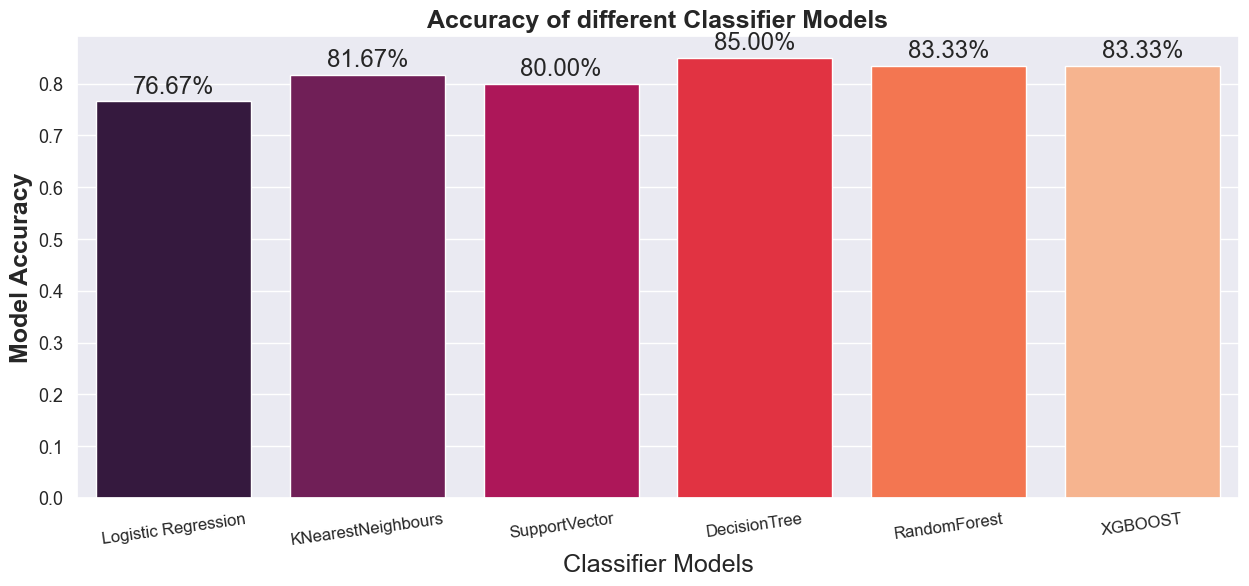

In [60]:
labels = ["Logistic Regression", "KNearestNeighbours","SupportVector","DecisionTree","RandomForest", "XGBOOST"]
plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")
ax = sns.barplot(x=labels, y=models_accuracy, palette = "rocket", saturation =1.5)
plt.xlabel("Classifier Models", fontsize = 18)
plt.ylabel("Model Accuracy", fontsize = 18, fontweight = "bold")
plt.title("Accuracy of different Classifier Models", fontsize = 18, fontweight = "bold")
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
#get the model accuracy percentage
for percent in ax.patches:
    width, height = percent.get_width(), percent.get_height()
    x, y = percent.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

### ENSEMBLE

In [61]:
models_voting = []
models_voting.append(('LogisticRegression', lr))
models_voting.append(('DecisionTreesClassifier', dtc ))
models_voting.append(('RandomForest', rfc))
models_voting.append(('KNN', knc ))
models_voting.append(('SVC', svc))
models_voting.append(('XGB', gbc ))

Hard voting classifier

In [62]:
VC_hard = VotingClassifier(estimators = models_voting, voting='hard')
VC_hard.fit(x_train, y_train)

VotingClassifier(estimators=[('LogisticRegression', LogisticRegression()),
                             ('DecisionTreesClassifier',
                              DecisionTreeClassifier(random_state=0)),
                             ('RandomForest',
                              RandomForestClassifier(n_estimators=11,
                                                     random_state=0)),
                             ('KNN', KNeighborsClassifier(n_neighbors=6)),
                             ('SVC', SVC(C=0.6, random_state=0)),
                             ('XGB',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=...
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=12,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=10, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None, ...))])

In [63]:
y_pred = VC_hard.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f'Confusion matrix is:\n{cm}')
print(f'\nThe accuracy score is: {accuracy}')
models_accuracy.append(accuracy)
print(f'\nModel predictions is: {y_pred}')

Confusion matrix is:
[[37  0]
 [ 8 15]]

The accuracy score is: 0.8666666666666667

Model predictions is: [0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0]


Compare the models against voting classifier

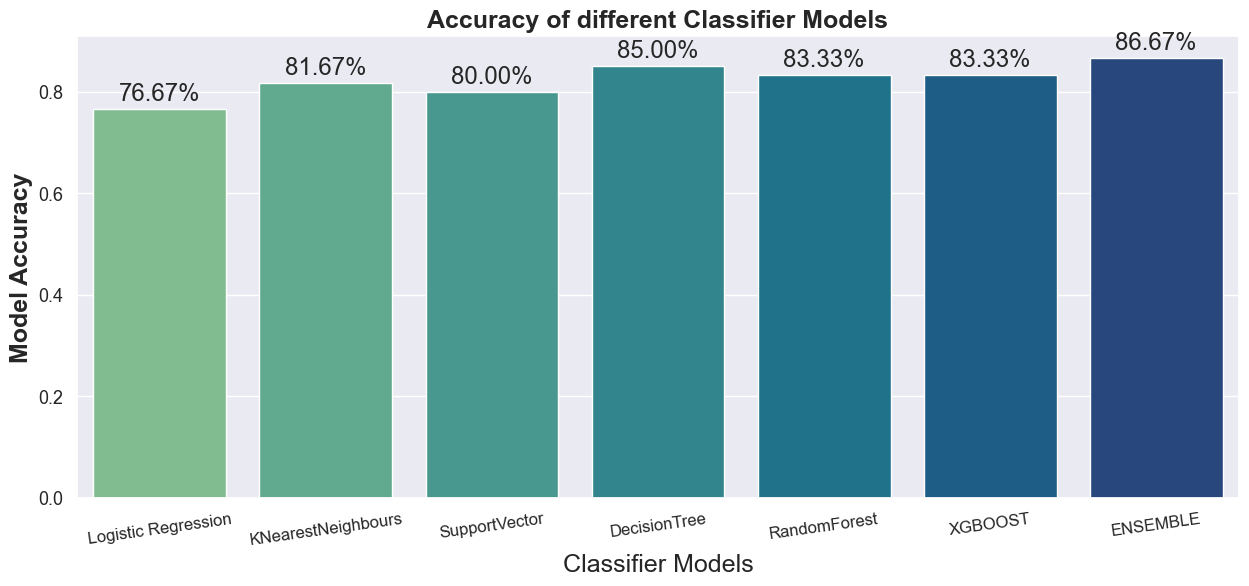

In [64]:
labels = ["Logistic Regression", "KNearestNeighbours","SupportVector","DecisionTree","RandomForest", "XGBOOST", "ENSEMBLE"]
plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")
ax = sns.barplot(x=labels, y=models_accuracy, palette = "crest", saturation =1.5)
plt.xlabel("Classifier Models", fontsize = 18)
plt.ylabel("Model Accuracy", fontsize = 18, fontweight = "bold")
plt.title("Accuracy of different Classifier Models", fontsize = 18, fontweight = "bold")
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
#get the model accuracy percentage
for percent in ax.patches:
    width, height = percent.get_width(), percent.get_height()
    x, y = percent.get_xy()  
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

<a id=500></a>
<h4 style= 'Background:crimson; color:white; border:0'><center>Feature Selection</center></h3>

* **Feature selection:** Is a method of reducing the input variables when when developing a model 
* less is more. is what comes to mind when using feature selection, reducing the number of input variable
  can reduce the computational cost and sometimes improve the accuracy of the model
* although this process is **not** done blindly, one method is to look at the significant/meaningful correlation
  between the feature and target for example if we had **index** feature it has no significant importance to target 
  DEATH_EVENT 

> The filter methods are as follows:
> * removing features with low variance A.K.A variance threshold
> * Kbest models for classification
> * Information gain

**Advantages**
* simplification of models to make them easier to interpret by researchers/users,
* shorter training times,
* to avoid the curse of dimensionality,
* improve data's compatibility with a learning model class,
* encode inherent symmetries present in the input space.

[Source](https://www.kaggle.com/code/kaanboke/feature-selection-the-most-common-methods-to-know)

In [67]:
X= heart_failure.drop('DEATH_EVENT', axis=1) # All features except target 'DEATH_EVENT'
y= heart_failure['DEATH_EVENT'] # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.20) #split train data 20-80

# what we want here is to see the importance of features to the target
# AKA the correlation, having variance of 0 means it hold no meaning to 
# be included in the training
variance = VarianceThreshold()  # as deafult threshold=0
variance.fit(X_train)
X_train_vth = X_train.iloc[:, variance.get_support()]

pd.DataFrame( {'Feature': X_train.columns,'Variance': variance.variances_,}).sort_values('Variance', ascending=True)

,Feature,Variance
10,smoking,0.215332
5,high_blood_pressure,0.227937
9,sex,0.229163
3,diabetes,0.241137
1,anaemia,0.245794
7,serum_creatinine,0.985834
8,serum_sodium,19.632464
0,age,55.000000
4,ejection_fraction,65.000000
11,time,281.000000


as we can see that most features in this dataset hold some meaning directly to death_event
we also explored that in the data visualization part

Feature 0 : 19.133
Feature 1 : 0.129
Feature 2 : 0.099
Feature 3 : 0.018
Feature 4 : 13.347
Feature 5 : 0.456
Feature 6 : 0.089
Feature 7 : 27.949
Feature 8 : 6.244
Feature 9 : 1.076
Feature 10 : 0.354
Feature 11 : 82.186



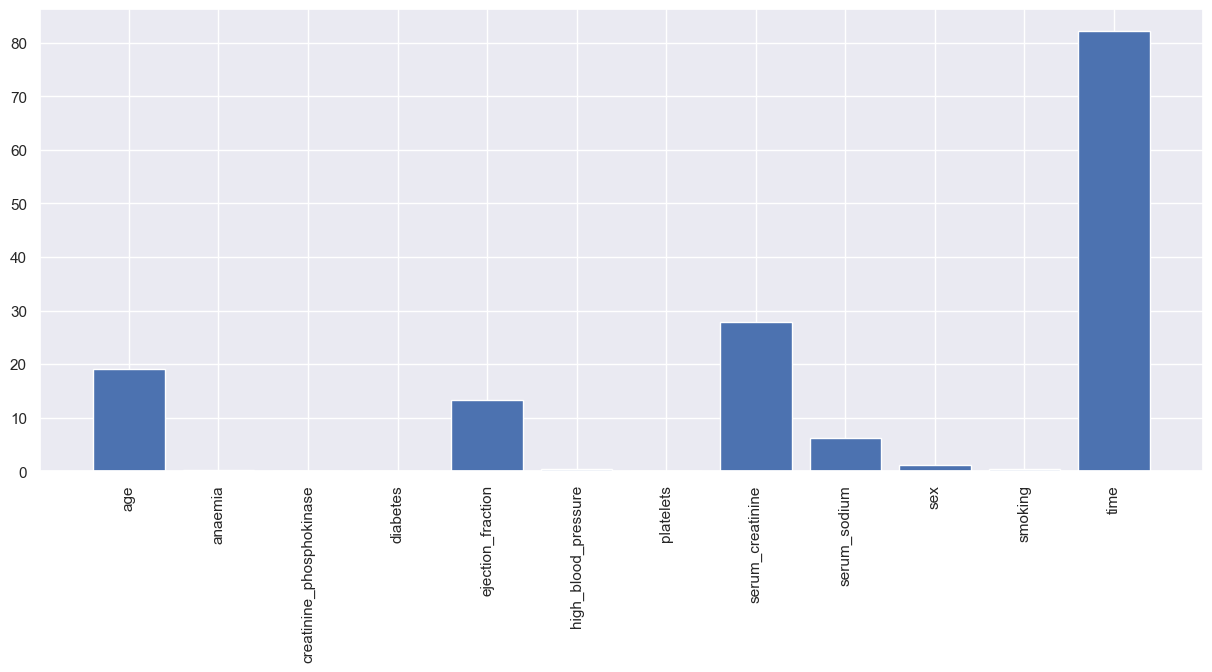

In [68]:
x= heart_failure.drop('DEATH_EVENT', axis=1) # all features except death
y= heart_failure['DEATH_EVENT'] #target death event

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=.30)

feature_selection = SelectKBest(score_func=f_classif, k=6)
feature_selection.fit(X_train, y_train)

# what are scores for the features
for i in range(len(feature_selection.scores_)):
    print(f'Feature {i} : {round(feature_selection.scores_[i],3)}')

print()

plt.bar([X_train.columns[i] for i in range(len(feature_selection.scores_))], feature_selection.scores_)
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (8,6)
plt.show()

In [69]:
transformedX_train = feature_selection.transform(X_train)
transformedX_test = feature_selection.transform(X_test)
print(f"Old Shape: {X_train.shape} New shape: {transformedX_train.shape}")
print(f"Old Shape: {X_test.shape} New shape: {transformedX_test.shape}")

Old Shape: (209, 12) New shape: (209, 6)
Old Shape: (90, 12) New shape: (90, 6)


In [70]:
feature_selection_accuracy = []

In [71]:
# Logistic regression with all features
lr = LogisticRegression(solver='liblinear', random_state=0)
lr2 = LogisticRegression(solver='liblinear', random_state=0)

# print the score of lr with all features(without feature selection)
lr.fit(X_train, y_train)
print(f'Score of logistic regression with all features: {round(lr.score(X_test, y_test),4)}')#round score to 4

#print the logistic regression with feature selection
lr2.fit(transformedX_train, y_train)
print(f'Score of logistic regression with only selected features: {round(lr2.score(transformedX_test, y_test),4)}')#round score to 4

#Confusion matrix and accuracy
y_pred01_lr = lr.predict(X_test)
y_pred02_lr = lr2.predict(transformedX_test)
cm01_lr = confusion_matrix(y_test, y_pred01_lr)
cm02_lr = confusion_matrix(y_test, y_pred02_lr)
accuracy01_lr = accuracy_score(y_test,y_pred01_lr)
accuracy02_lr = accuracy_score(y_test, y_pred02_lr)

# Accuracy and confusion Matrix
print(f'\nConfusion matrix of Logistic Regression with all features is:\n{cm01_lr}')
print(f'The accuracy score of Logistic Regression with all features is: {accuracy01_lr}')
print(f'\n\nConfusion matrix of Logistic Regression with only selected features is:\n{cm02_lr}')
print(f'The accuracy score of Logistic Regression with only selected features is: {accuracy02_lr}')

# Append to list to create Accurasy bar plot
feature_selection_accuracy.append(accuracy01_lr)
feature_selection_accuracy.append(accuracy02_lr)


Score of logistic regression with all features: 0.7667
Score of logistic regression with only selected features: 0.7778

Confusion matrix of Logistic Regression with all features is:
[[50  3]
 [18 19]]
The accuracy score of Logistic Regression with all features is: 0.7666666666666667


Confusion matrix of Logistic Regression with only selected features is:
[[49  4]
 [16 21]]
The accuracy score of Logistic Regression with only selected features is: 0.7777777777777778


In [72]:
# Decision Tree classifier with all features
dtc01 = DecisionTreeClassifier(random_state=0)
dtc01.fit(X_train, y_train)

#Decision Tree classifier with feature selection
dtc02 = DecisionTreeClassifier(random_state=0)
dtc02.fit(transformedX_train, y_train)

#Confusion matrix and accuracy
y_pred01 = dtc01.predict(X_test)
y_pred02 = dtc02.predict(transformedX_test)
cm01 = confusion_matrix(y_test, y_pred01)
cm02 = confusion_matrix(y_test, y_pred02)
accuracy01 = accuracy_score(y_test,y_pred01)
accuracy02 = accuracy_score(y_test, y_pred02)

# Score
print(f'Score of Decision Tree Classifier with all features: {round(dtc01.score(X_test, y_test),4)}')#round score to 4
print(f'Score of Decision Tree Classifier with only selected features: {round(dtc02.score(transformedX_test, y_test),4)}')#round score to 4

# Accuracy and confusion Matrix
print(f'\nConfusion matrix of Decision Tree Classifier with all features is:\n{cm01}')
print(f'The accuracy score of Decision Tree Classifier with all features is: {accuracy01}')
print(f'\n\nConfusion matrix of Decision Tree Classifier with only selected features is:\n{cm02}')
print(f'The accuracy score of Decision Tree Classifier with only selected features is: {accuracy02}')

feature_selection_accuracy.append(accuracy01)
feature_selection_accuracy.append(accuracy02)

Score of Decision Tree Classifier with all features: 0.6889
Score of Decision Tree Classifier with only selected features: 0.7222

Confusion matrix of Decision Tree Classifier with all features is:
[[42 11]
 [17 20]]
The accuracy score of Decision Tree Classifier with all features is: 0.6888888888888889


Confusion matrix of Decision Tree Classifier with only selected features is:
[[44  9]
 [16 21]]
The accuracy score of Decision Tree Classifier with only selected features is: 0.7222222222222222


In [73]:
len(feature_selection_accuracy)

4

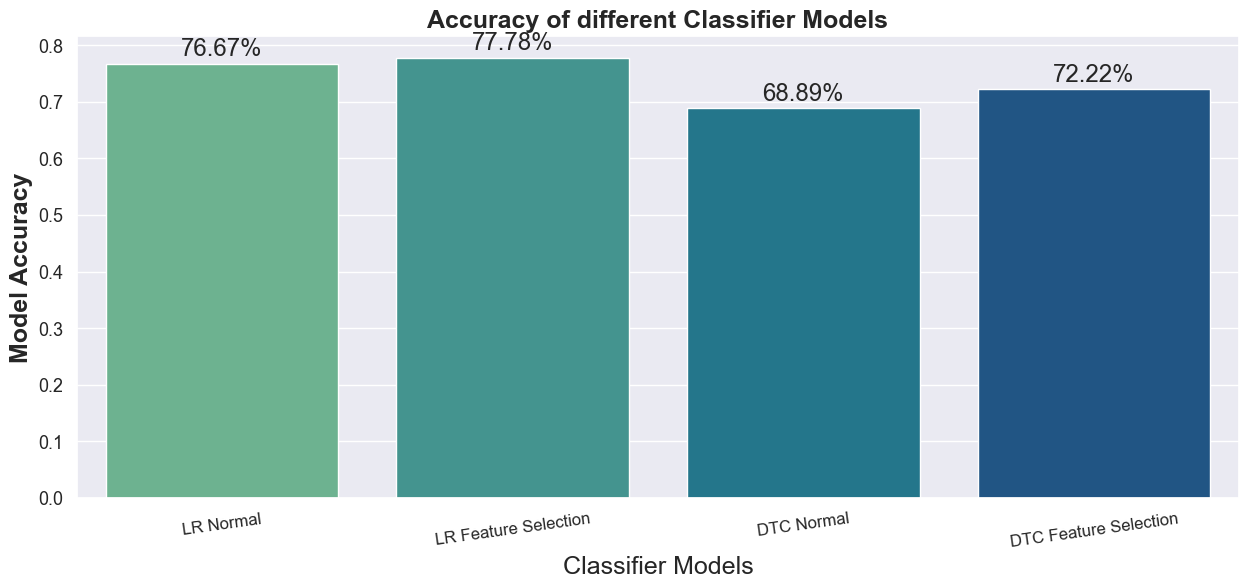

In [74]:
labels = ["LR Normal", "LR Feature Selection","DTC Normal","DTC Feature Selection"]
plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")
ax = sns.barplot(x=labels, y=feature_selection_accuracy, palette = "crest", saturation =1.5)
plt.xlabel("Classifier Models", fontsize = 18)
plt.ylabel("Model Accuracy", fontsize = 18, fontweight = "bold")
plt.title("Accuracy of different Classifier Models", fontsize = 18, fontweight = "bold")
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
#get the model accuracy percentage
for percent in ax.patches:
    width, height = percent.get_width(), percent.get_height()
    x, y = percent.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')